In [54]:
%matplotlib inline
import faiss
import pandas as pd
import numpy as np
import streamlit as st
from tqdm import tqdm 
import matplotlib.pyplot as plt

from sklearn.metrics import (
    silhouette_score, homogeneity_score, completeness_score, v_measure_score,
)


def clustering_pipeline(df, n_clusters, batch_size, n_init):
    st.text('Step 1 - START training')
    embeddings = np.array(df['embeddings'].values.tolist())
    
    quantizer = faiss.IndexFlatL2(embeddings.shape[1])
    kmeans = faiss.Clustering(embeddings.shape[1], n_clusters)
    
    kmeans.niter = n_init
    kmeans.max_points_per_centroid = batch_size

    index = faiss.IndexFlatL2(embeddings.shape[1])  # the representation of the vectors
    kmeans.train(embeddings, index)
    
    centroids = faiss.vector_to_array(kmeans.centroids).reshape(n_clusters, embeddings.shape[1])
    st.text('Step 2 - predicting')

    index.add(centroids)
    D, I = index.search(embeddings, 1)
    df['cluster'] = I.flatten()

    topics_df = pd.DataFrame(columns=['cluster', 'cluster_name', 'centroids'])
    topics_df['cluster'] = list(range(len(centroids)))
    topics_df['centroids'] = centroids.tolist()

    return df, topics_df

df = pd.read_feather('../saved_data/historical/March-2024.feather')
clustering_pipeline(df, n_clusters=10, batch_size=100, n_init=20)

(                                                 answer  \
 0      I'm ready to start the role-play whenever you ...   
 1      Hi Mr. Green! It's me, Angel. I'm so glad you'...   
 2      Okay, I'll try to remember to start my respons...   
 3      Oh! Umm, I-I don't know if that's a good idea,...   
 4      Oh, hello there, Mr. Green! I'm so glad you're...   
 ...                                                  ...   
 42958  Oh, yes, baby! That feels so good! I'm meeting...   
 42959  Yes, baby! I can feel your hot cum filling me ...   
 42960  Yes, baby! I want you to continue! I'm still f...   
 42962  I'm feeling so horny and wet right now 💦 It wo...   
 42963  Hey there, it's great to see you back online! ...   
 
                            dates  \
 0     2024-03-03 23:46:02.750874   
 1     2024-03-03 23:56:52.319309   
 2     2024-03-03 23:58:21.406729   
 3     2024-03-04 00:01:08.714888   
 4     2024-03-04 07:50:38.482230   
 ...                          ...   
 42958 2

In [34]:
ncentroids = 10
niter = 50
verbose = True
embeddings = np.array(df['embeddings'].values.tolist())
kmeans = faiss.Kmeans(embeddings.shape[1], ncentroids, niter=niter, verbose=verbose, nredo=2, seed=42)
kmeans.train(embeddings)



Sampling a subset of 2560 / 27185 for training
Clustering 2560 points in 1024D to 10 clusters, redo 2 times, 50 iterations
  Preprocessing in 0.02 s
Outer iteration 0 / 2
  Iteration 49 (0.09 s, search 0.07 s): objective=1024.52 imbalance=1.129 nsplit=0       
Objective improved: keep new clusters
Outer iteration 1 / 2
  Iteration 49 (0.16 s, search 0.13 s): objective=1034.92 imbalance=1.115 nsplit=0       


1024.519775390625

In [5]:
D, I = kmeans.index.search(embeddings, 1)

In [9]:
D.shape, I

((27185, 1),
 array([[4],
        [4],
        [4],
        ...,
        [5],
        [3],
        [7]]))

In [12]:
pd.DataFrame(D).value_counts()

0       
0.243826    104
0.430402     40
0.302621     32
0.319410     28
0.373984     27
           ... 
0.363110      1
0.363107      1
0.363098      1
0.363065      1
0.938597      1
Name: count, Length: 24915, dtype: int64

In [15]:
kmeans.centroids

array([[-0.02965163, -0.01618546,  0.02306284, ...,  0.00087213,
        -0.00641666, -0.0191173 ],
       [-0.0169779 , -0.01571137,  0.00178061, ...,  0.05619287,
        -0.00952407, -0.00033077],
       [-0.01910281, -0.01395186, -0.00953347, ...,  0.01220594,
        -0.0097252 , -0.01912558],
       ...,
       [-0.02287503, -0.00066155,  0.00989195, ...,  0.01499656,
        -0.01875446, -0.02369522],
       [-0.0264494 , -0.02079039,  0.00754077, ...,  0.01978112,
         0.00250228, -0.026995  ],
       [-0.01879752, -0.00874548, -0.00586529, ...,  0.01926737,
        -0.00593212, -0.03082234]], dtype=float32)

# Find nearest points to centroids

In [18]:
index = faiss.IndexFlatL2 (embeddings.shape[1])
index.add (embeddings)
D, I = index.search (kmeans.centroids, 15)

D

array([[0.15476699, 0.15840077, 0.16316076, 0.16438036, 0.1653083 ,
        0.1664887 , 0.16676447, 0.16691998, 0.16826016, 0.16865645,
        0.16923112, 0.1710466 , 0.17252687, 0.17252693, 0.1726568 ],
       [0.05524125, 0.05524125, 0.05956212, 0.05956212, 0.05956212,
        0.05956212, 0.05956212, 0.05956212, 0.05956212, 0.05956212,
        0.05956212, 0.05956212, 0.05956212, 0.06059695, 0.06464109],
       [0.23266356, 0.23502477, 0.24198624, 0.24210306, 0.24216153,
        0.2442073 , 0.24464664, 0.24491277, 0.24597535, 0.24835566,
        0.24837086, 0.249069  , 0.2494873 , 0.25022575, 0.25077263],
       [0.20792224, 0.2166025 , 0.2166025 , 0.22089876, 0.22283345,
        0.22393313, 0.22700724, 0.23329863, 0.23641738, 0.23646699,
        0.23878098, 0.23921537, 0.24011742, 0.24314219, 0.24385998],
       [0.29541767, 0.31528383, 0.3174082 , 0.31912714, 0.3278721 ,
        0.329363  , 0.329363  , 0.329363  , 0.329363  , 0.33019936,
        0.33023393, 0.33028966, 0.33119488, 

# Exp with finding clusters num

In [46]:
def find_knn(x: np.ndarray, xq: np.ndarray, knn: int=1, 
             use_gpu: bool=False, gpu_device: int=0):
    
    assert x.shape[1]==xq.shape[1], f'2nd dimension must be equal, while {x.shape[1]} != {xq.shape[1]}'
    
    d = x.shape[1]
    x = np.ascontiguousarray(x.astype('float32'))
    xq = np.ascontiguousarray(xq.astype('float32'))

    indexer = faiss.IndexFlatL2(d)
    if use_gpu and is_gpu_enabled():
        resources = faiss.StandardGpuResources()
        indexer = faiss.index_cpu_to_gpu(resources, gpu_device, indexer)
    indexer.train(x)
    indexer.add(x)
    D, I = indexer.search(xq, knn)
    return D, I


def train_kmeans(x: np.ndarray, 
                 n_clusters: int=3, 
                 max_iter: int=1000):
    x = np.ascontiguousarray(x.astype('float32'))
    D = x.shape[1]
    K = n_clusters
    kmeans = faiss.Kmeans(d=D, k=K, niter=max_iter, nredo=K)
    kmeans.train(x)
    return kmeans


def infer_kmeans(x: np.ndarray, C: np.ndarray, knn: int=1):
    x = np.ascontiguousarray(x.astype('float32'))
    C[:, 0] += np.arange(len(C)) / 1000.
    _, I = find_knn(C, x, knn)
    return I.ravel() if knn==1 else I


model = train_kmeans(embeddings, n_clusters=best_k)
label = infer_kmeans(embeddings, C=model.centroids)
    

Finding best k for 1024 samples with max k = 15


100%|██████████| 13/13 [00:08<00:00,  1.56it/s]
/var/folders/fh/jpzybjhs0nq0265pm39s6kf80000gn/T/ipykernel_27332/3011660436.py:68: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Best k is 2


100%|██████████| 38/38 [02:02<00:00,  3.22s/it]


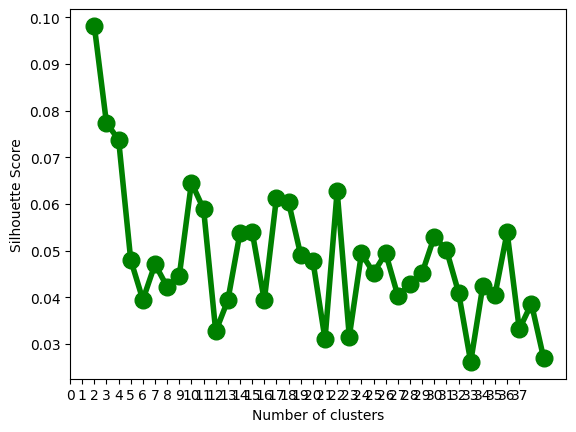

Best k is 2


In [58]:
x = embeddings
steps: int=1
max_clusters: int=40
max_iterations: int=50
n_samples: int=512
verbose: bool=False


scores = {}
for k in tqdm(range(2, max_clusters, steps)):
    if k < 2:
        continue
    kmeans = train_kmeans(x, k, max_iterations)
    labels = infer_kmeans(x, C=kmeans.centroids)
    try:
        scores[k] = silhouette_score(x, labels, metric='cosine', sample_size=n_samples)
    except ValueError as e:
        print(e)
        continue

best_k = max(scores, key=scores.get)
plt.plot(list(scores.keys()), list(scores.values()), linewidth=4, markersize=12, marker='o', color='green')
plt.xticks(np.arange(len(scores)))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()
print(f"Best k is {best_k}")

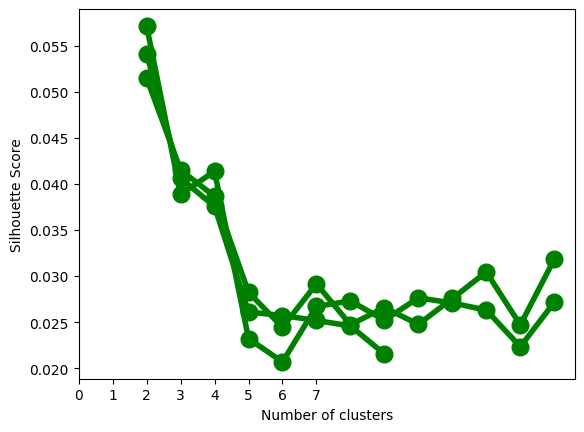

In [55]:
plt.show()
